ANALYSIS OF ELECTRICITY USAGE IN A RESIDENTIAL COMPLEX

NUMPY - Random data generation , Arrays.
Pandas - Grouping , Filtering , Aggregations.

In [3]:
import numpy as np
import pandas as pd

In [4]:
np.random.seed(42)

In [5]:
apartments=[f"Apt_{i}" for i in range(1,21)]

In [6]:
dates=pd.date_range(start="2025-07-01",periods=30,freq="D")

In [7]:
data={
    "Data":np.tile(dates,len(apartments)),
    "Apartment":np.repeat(apartments,len(dates)),
    "Electricity_usage":np.random.normal(loc=20,scale=5,size=len(dates)*len(apartments))
}


In [9]:
data

{'Data': array(['2025-07-01T00:00:00.000000000', '2025-07-02T00:00:00.000000000',
        '2025-07-03T00:00:00.000000000', '2025-07-04T00:00:00.000000000',
        '2025-07-05T00:00:00.000000000', '2025-07-06T00:00:00.000000000',
        '2025-07-07T00:00:00.000000000', '2025-07-08T00:00:00.000000000',
        '2025-07-09T00:00:00.000000000', '2025-07-10T00:00:00.000000000',
        '2025-07-11T00:00:00.000000000', '2025-07-12T00:00:00.000000000',
        '2025-07-13T00:00:00.000000000', '2025-07-14T00:00:00.000000000',
        '2025-07-15T00:00:00.000000000', '2025-07-16T00:00:00.000000000',
        '2025-07-17T00:00:00.000000000', '2025-07-18T00:00:00.000000000',
        '2025-07-19T00:00:00.000000000', '2025-07-20T00:00:00.000000000',
        '2025-07-21T00:00:00.000000000', '2025-07-22T00:00:00.000000000',
        '2025-07-23T00:00:00.000000000', '2025-07-24T00:00:00.000000000',
        '2025-07-25T00:00:00.000000000', '2025-07-26T00:00:00.000000000',
        '2025-07-27T00:00:00.0

In [10]:
df=pd.DataFrame(data)

In [11]:
df["Electricity_usage"]=df["Electricity_usage"].round(2)

In [12]:
print(df.describe())

                      Data  Electricity_usage
count                  600         600.000000
mean   2025-07-15 12:00:00          19.932500
min    2025-07-01 00:00:00           3.790000
25%    2025-07-08 00:00:00          16.530000
50%    2025-07-15 12:00:00          20.040000
75%    2025-07-23 00:00:00          23.112500
max    2025-07-30 00:00:00          39.260000
std                    NaN           4.861071


In [13]:
print(df.dtypes)

Data                 datetime64[ns]
Apartment                    object
Electricity_usage           float64
dtype: object


Total usage per apartments.

In [15]:
usage_per_apartment=df.groupby("Apartment")["Electricity_usage"].sum().sort_values(ascending=False)

In [16]:
daily_avg=df.groupby("Data")["Electricity_usage"].mean()
print(daily_avg.head())

Data
2025-07-01    21.0440
2025-07-02    20.8695
2025-07-03    19.5685
2025-07-04    20.9855
2025-07-05    19.7835
Name: Electricity_usage, dtype: float64


Visualization using matplotlib and seaborn

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

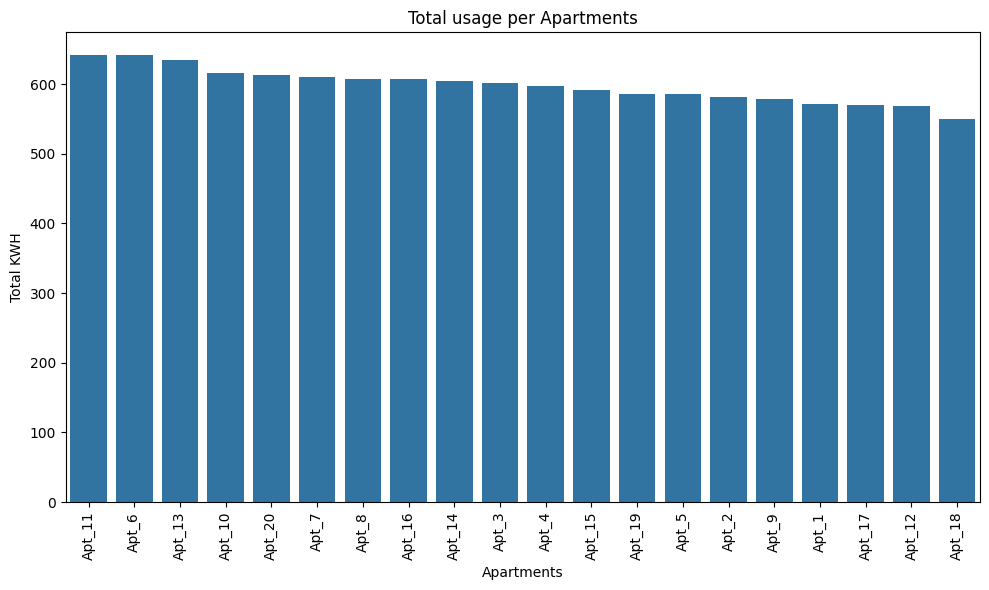

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x=usage_per_apartment.index, y=usage_per_apartment.values)
plt.xticks(rotation=90)
plt.title("Total usage per Apartments")
plt.xlabel("Apartments")
plt.ylabel("Total KWH")
plt.tight_layout()

Time series plot of daily average

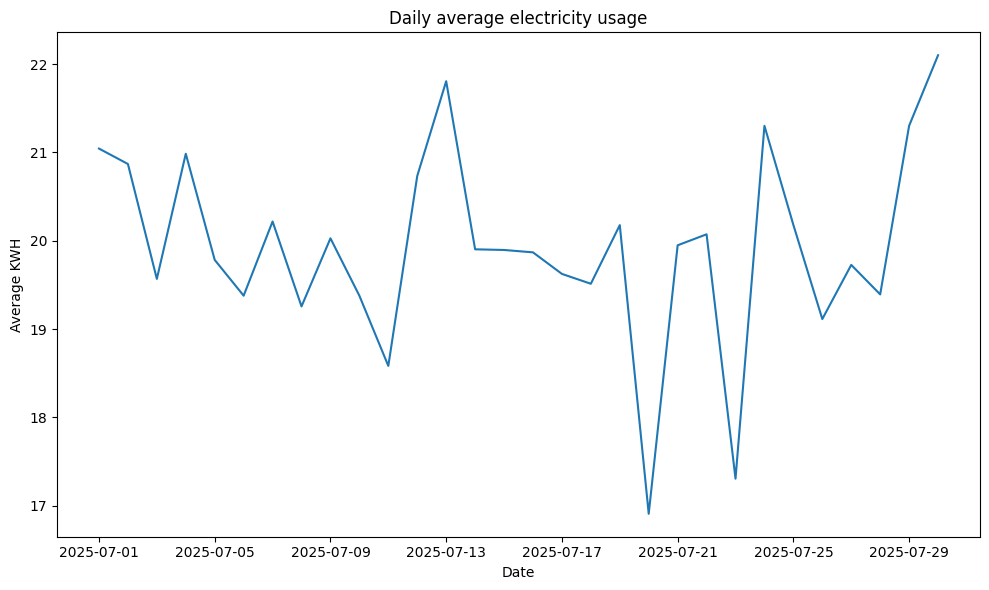

In [19]:
plt.figure(figsize=(10,6))
sns.lineplot(x=daily_avg.index, y=daily_avg.values)
plt.title("Daily average electricity usage")
plt.xlabel("Date")
plt.ylabel("Average KWH")
plt.tight_layout()
plt.show()

Anomaly detection

In [20]:
threshold=df["Electricity_usage"].mean()+2*df["Electricity_usage"].std()
df["High_usage_flag"]=df["Electricity_usage"]>threshold
print(df[df["High_usage_flag"]==True].head())

          Data Apartment  Electricity_usage  High_usage_flag
113 2025-07-24     Apt_4              32.32             True
125 2025-07-06     Apt_5              30.95             True
179 2025-07-30     Apt_6              33.60             True
209 2025-07-30     Apt_7              39.26             True
220 2025-07-11     Apt_8              31.57             True
